<a href="https://colab.research.google.com/github/ojhabineet/parkinson-disease/blob/main/parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


This project detects Parkinson’s disease using voice measurements.
Model Used: Support Vector Machine (SVM)
Dataset: UCI Parkinson Dataset
Environment: Google Colab


In [2]:
from google.colab import files
uploaded = files.upload()


Saving parkinsons.data to parkinsons (1).data


In [3]:
parkinsons_data = pd.read_csv("parkinsons.data")

parkinsons_data.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
parkinsons_data.shape
parkinsons_data.describe()
parkinsons_data['status'].value_counts()


,count
status,
1,147
0,48


In [5]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)


In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
model = SVC(kernel='linear')

model.fit(X_train, Y_train)


SVC(kernel='linear')

In [9]:
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, X_train_prediction)

print("Training Accuracy :", training_accuracy)


X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, X_test_prediction)

print("Testing Accuracy :", test_accuracy)


Training Accuracy : 0.8974358974358975
Testing Accuracy : 0.8974358974358975


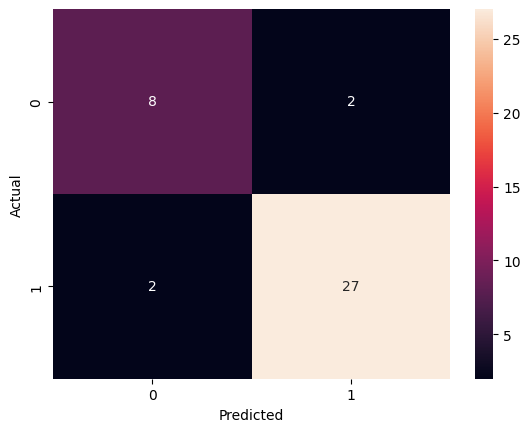

In [10]:
cm = confusion_matrix(Y_test, X_test_prediction)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
print(classification_report(Y_test, X_test_prediction))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



In [14]:

input_data = X.iloc[[0]]

std_data = scaler.transform(input_data)
prediction = model.predict(std_data)

if prediction[0] == 0:
    print("Healthy")
else:
    print("Parkinson Detected")



Parkinson Detected
